<a href="https://colab.research.google.com/github/whoawoo/api_class/blob/main/api_0404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

batch_size = 32
epochs = 20
n_class = 10

x_train = x_train / 255
x_test = x_test / 255
t_train = tf.keras.utils.to_categorical(t_train, n_class)
t_test = tf.keras.utils.to_categorical(t_test, n_class)

170498071/170498071 [==============================] - 4s 0us/step


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential()

In [7]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(
    rotation_range=0.2,
    horizontal_flip=True)
generator.fit(x_train)

history = model.fit_generator(generator.flow(x_train, t_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, t_test))

Epoch 1/20


<ipython-input-12-c7ba55943fe5>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator.flow(x_train, t_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, t_test))


1563/1563 [==============================] - 41s 19ms/step - loss: 1.5016 - accuracy: 0.4539 - val_loss: 1.1041 - val_accuracy: 0.6107
Epoch 2/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0809 - accuracy: 0.6181 - val_loss: 0.9253 - val_accuracy: 0.6750
Epoch 3/20
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9266 - accuracy: 0.6773 - val_loss: 0.8354 - val_accuracy: 0.7041
Epoch 4/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8300 - accuracy: 0.7112 - val_loss: 0.7944 - val_accuracy: 0.7216
Epoch 5/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7703 - accuracy: 0.7329 - val_loss: 0.7194 - val_accuracy: 0.7484
Epoch 6/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7201 - accuracy: 0.7479 - val_loss: 0.7279 - val_accuracy: 0.7555
Epoch 7/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6869 - accuracy: 0.7618 - val_loss: 0.6672 - val_accura

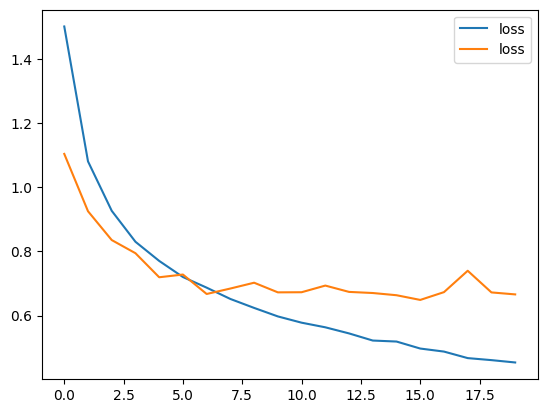

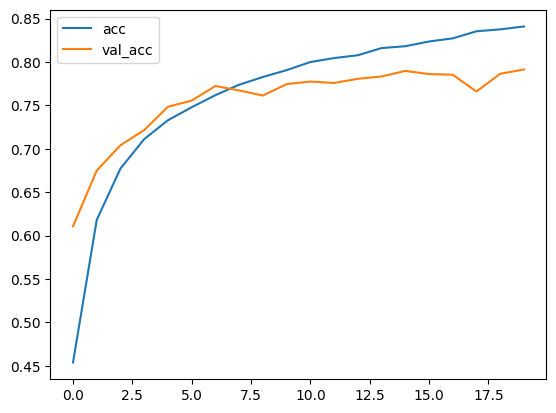

In [13]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

In [14]:
loss, accuracy = model.evaluate(x_test, t_test)
print("오차: ", loss, "정밀도: ", accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.6659 - accuracy: 0.7914
오차:  0.6659125685691833 정밀도:  0.7914000153541565


In [15]:
import os
from keras.models import load_model


path = '/content/drive/MyDrive/cnn_cifar10/'

if not os.path.exists(path):
    os.makedirs(path)
  
model.save(path + "model_cnn_cifar10.h5")